# Exercise 7: Unsupervised Learning - Clustering Analysis of Banana Quality Dataset


For this  exercise, I have chosen the same dataset **Banana Quality Dataset** which contains measurements of various physical and chemical properties of bananas to predict their quality classification.

**Source**: https://www.kaggle.com/datasets/l3llff/banana

### Problem Statement
Discover natural clusters in banana data based on physical/chemical properties **without using quality labels**.

Solving this problem is valuable for industries like agriculture, food safety, and supply chain optimization, as it can improve sorting, pricing, and waste reduction processes.

This unsupervised approach can reveal hidden patterns and provide quality insights even when labeled data is unavailable.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [ ]:
data_path = '../data/banana/banana_quality.csv'
df = pd.read_csv(data_path)

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())

# for unsupervised learning, we'll use features without the quality label
features = ['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness', 'Acidity']
X = df[features].copy()
y_true = df['Quality'].copy()

print(f"\nFeatures for clustering: {features}")
print(f"Feature matrix shape: {X.shape}")
print(f"True labels available for evaluation: {y_true.value_counts().to_dict()}")

Dataset Shape: (8000, 8)

First 5 rows:
       Size    Weight  Sweetness  Softness  HarvestTime  Ripeness   Acidity  \
0 -1.924968  0.468078   3.077832 -1.472177     0.294799  2.435570  0.271290   
1 -2.409751  0.486870   0.346921 -2.495099    -0.892213  2.067549  0.307325   
2 -0.357607  1.483176   1.568452 -2.645145    -0.647267  3.090643  1.427322   
3 -0.868524  1.566201   1.889605 -1.273761    -1.006278  1.873001  0.477862   
4  0.651825  1.319199  -0.022459 -1.209709    -1.430692  1.078345  2.812442   

  Quality  
0    Good  
1    Good  
2    Good  
3    Good  
4    Good  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float6

## Data Preprocessing and Algorithmic Details

For clustering, we will use the Euclidean distance because:
- All features are continuous numerical values
- After standardization, all features have comparable scales
- Euclidean distance is optimal for identifying spherical clusters
- It's the standard metric for K-means clustering

### For preprocessing
We will use only physical/chemical measurements (exclude quality labels) and we will use scale features to have mean=0 and std=1 for fair distance computation.

In [ ]:

print(f"Dataset shape: {df.shape}")
print(f"Features: {features}")
print(f"Class distribution: {y_true.value_counts().to_dict()}")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\nOriginal feature ranges:")
print(X.describe().round(2))
print(f"\nStandardized feature ranges:")
print(pd.DataFrame(X_scaled, columns=features).describe().round(2))

Dataset shape: (8000, 8)
Features: ['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness', 'Acidity']
Class distribution: {'Good': 4006, 'Bad': 3994}

Original feature ranges:
          Size   Weight  Sweetness  Softness  HarvestTime  Ripeness  Acidity
count  8000.00  8000.00    8000.00   8000.00      8000.00   8000.00  8000.00
mean     -0.75    -0.76      -0.77     -0.01        -0.75      0.78     0.01
std       2.14     2.02       1.95      2.07         2.00      2.11     2.29
min      -8.00    -8.28      -6.43     -6.96        -7.57     -7.42    -8.23
25%      -2.28    -2.22      -2.11     -1.59        -2.12     -0.57    -1.63
50%      -0.90    -0.87      -1.02      0.20        -0.93      0.96     0.10
75%       0.65     0.78       0.31      1.55         0.51      2.26     1.68
max       7.97     5.68       7.54      8.24         6.29      7.25     7.41

Standardized feature ranges:
          Size   Weight  Sweetness  Softness  HarvestTime  Ripeness  Acidity
count  80

## Determining Optimal Number of Clusters

### Elbow Method (as seen in tp8)
We use the Elbow Method to find the optimal number of clusters by analyzing the within-cluster sum of squares (WCSS). The "elbow" point indicates the best k value.

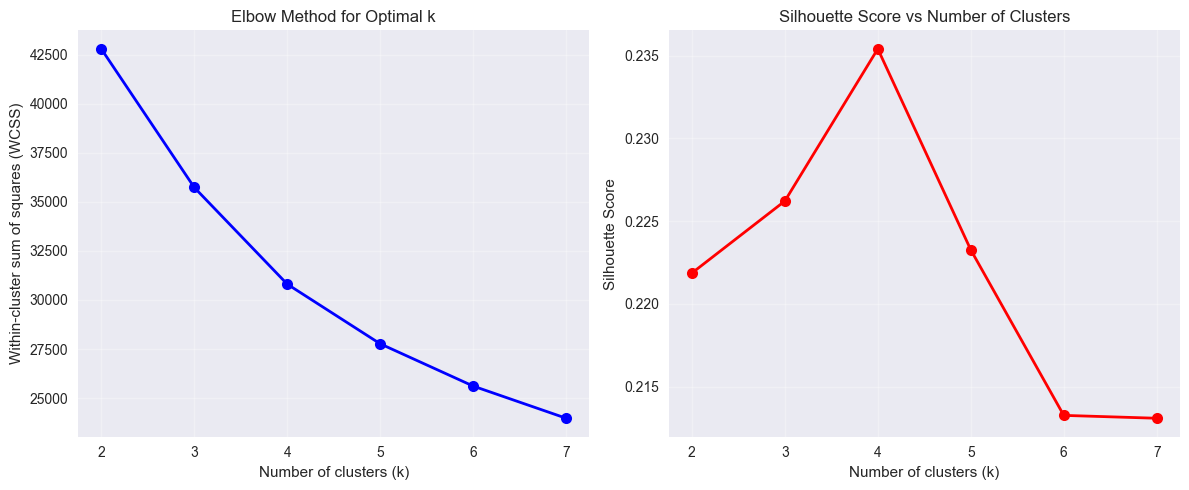

Optimal number of clusters: 4
Best silhouette score: 0.2354

Scores for different k values:
   k        WCSS  Silhouette Score
0  2  42801.7178            0.2219
1  3  35737.2592            0.2262
2  4  30807.1335            0.2354
3  5  27764.8468            0.2233
4  6  25609.2302            0.2133
5  7  23969.2614            0.2131


In [ ]:
k_range = range(2, 8)
wcss = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k}")
print(f"Best silhouette score: {max(silhouette_scores):.4f}")

scores_df = pd.DataFrame({
    'k': k_range,
    'WCSS': wcss,
    'Silhouette Score': silhouette_scores
})
print("\nScores for different k values:")
print(scores_df.round(4))

## K-Means Clustering

### Algorithm Details

The K-Means algorithm works by trying to minimize the within-cluster sum of squares (WCSS), which means it wants to group data points so that points within each cluster are as close as possible to their cluster center. The algorithm uses Euclidean distance to measure how far apart data points are from each other and from cluster centers.

For initialization, we use k-means++ which is a smart way to choose starting positions for cluster centers rather than picking them randomly. This helps the algorithm converge faster and find better clusters. The algorithm then follows Lloyd's method, which iteratively updates cluster centers and reassigns points until it reaches a stable solution.

### Why K-Means is Suitable for This Problem

K-Means is a good choice for our banana quality dataset because all our features are numerical and continuous measurements like size, weight, and sweetness. Since we've standardized all features to have the same scale, each feature contributes equally to the distance calculations, which is important for fair clustering.

We expect the banana quality data to form roughly spherical clusters since similar bananas should group together in a round pattern in the feature space. K-Means is also computationally efficient, which is valuable when working with our dataset of 8000 banana samples.

In [ ]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

print(f"K-Means Clustering Results:")
print(f"Number of clusters: {optimal_k}")
print(f"Cluster sizes: {np.bincount(cluster_labels)}")
print(f"Cluster centroids shape: {kmeans.cluster_centers_.shape}")

df_clustered = df.copy()
df_clustered['Cluster'] = cluster_labels

K-Means Clustering Results:
Number of clusters: 4
Cluster sizes: [2044 1805 1977 2174]
Cluster centroids shape: (4, 7)


## Evaluation of Clustering Results

### Scoring Metrics for Clustering

To evaluate how well our clustering algorithm performed, we need to use metrics that are specifically designed for unsupervised learning problems. Since we don't have ground truth labels during clustering, we rely on both internal and external validation measures.

The Silhouette Score helps us understand how well-separated and cohesive our clusters are. It ranges from -1 to 1, where values closer to 1 indicate that points are well-matched to their own cluster and poorly matched to neighboring clusters. A score near 0 suggests overlapping clusters, while negative values indicate that points might be assigned to the wrong clusters.

The Adjusted Rand Index compares our discovered clusters to the true quality labels that we know exist in the dataset. This external validation metric ranges from 0 to 1, where 1 means perfect agreement with the true labels and 0 indicates random clustering. This helps us understand if our unsupervised approach discovered meaningful patterns that align with actual banana quality.

Cluster Purity gives us an intuitive measure of how "clean" each cluster is by calculating the percentage of the dominant quality label within each cluster. High purity scores indicate that each cluster predominantly contains bananas of the same quality type, which suggests successful pattern discovery.

In [ ]:
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
y_numeric = (y_true == 'Good').astype(int)
ari = adjusted_rand_score(y_numeric, cluster_labels)

print(f"Clustering Performance:")
print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Adjusted Rand Index: {ari:.4f}")

print(f"\nCluster vs True Quality Comparison:")
cross_tab = pd.crosstab(cluster_labels, y_true, margins=True)
print(cross_tab)

cluster_purity = []
for cluster_id in range(optimal_k):
    cluster_mask = cluster_labels == cluster_id
    cluster_qualities = y_true[cluster_mask]
    dominant_quality = cluster_qualities.mode()[0]
    purity = (cluster_qualities == dominant_quality).sum() / len(cluster_qualities)
    cluster_purity.append(purity)
    print(f"Cluster {cluster_id}: {len(cluster_qualities)} samples, '{dominant_quality}' dominant ({purity:.1%} purity)")

print(f"\nOverall cluster purity: {np.mean(cluster_purity):.1%}")

Clustering Performance:
Silhouette Score: 0.2354
Adjusted Rand Index: 0.3205

Cluster vs True Quality Comparison:
Quality   Bad  Good   All
row_0                    
0        1784   260  2044
1        1738    67  1805
2         209  1768  1977
3         263  1911  2174
All      3994  4006  8000
Cluster 0: 2044 samples, 'Bad' dominant (87.3% purity)
Cluster 1: 1805 samples, 'Bad' dominant (96.3% purity)
Cluster 2: 1977 samples, 'Good' dominant (89.4% purity)
Cluster 3: 2174 samples, 'Good' dominant (87.9% purity)

Overall cluster purity: 90.2%


## Cluster Interpretation and Visualization

### Understanding the Discovered Clusters
Let's analyze what characteristics define each cluster and visualize the results using PCA.

Cluster Characteristics (Mean Values):
          Size  Weight  Sweetness  Softness  HarvestTime  Ripeness  Acidity
Cluster                                                                    
0       -1.896  -1.258     -1.431    -1.654       -1.893     1.472   -1.170
1       -1.145  -1.711     -1.805     1.439       -1.310    -1.799    1.389
2       -1.623   1.596      1.623    -1.050       -1.445     1.279    1.810
3        1.457  -1.648     -1.466     1.262        1.417     1.821   -1.666

PCA Explained Variance: 30.8% + 20.0% = 50.8%


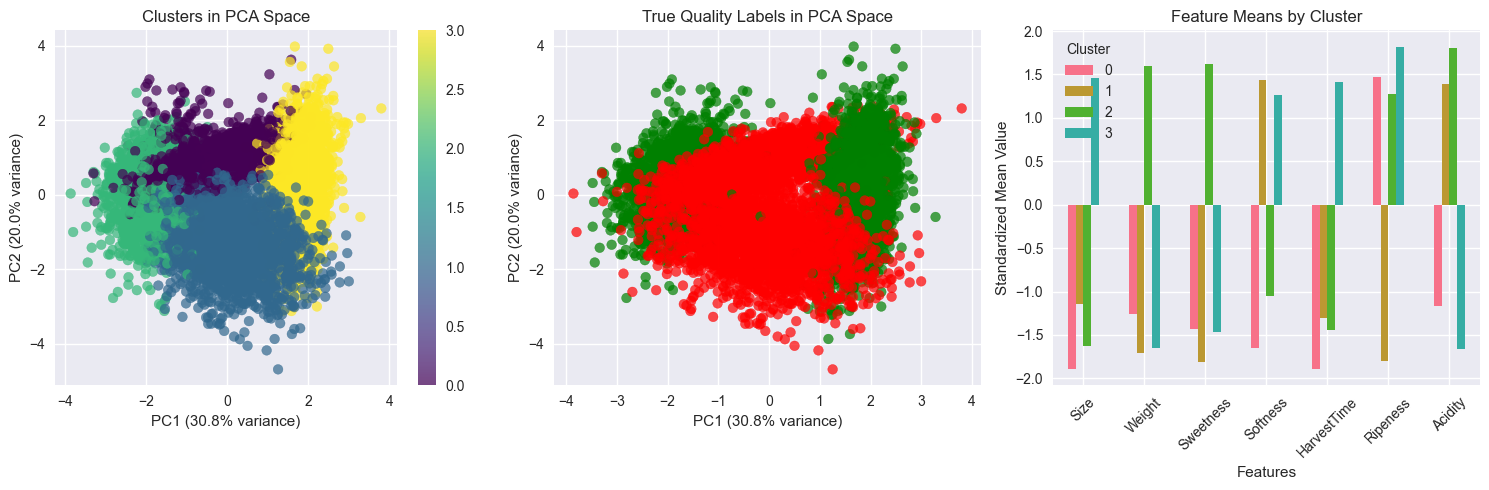

In [42]:
cluster_stats = df_clustered.groupby('Cluster')[features].mean()
print("Cluster Characteristics (Mean Values):")
print(cluster_stats.round(3))

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"\nPCA Explained Variance: {pca.explained_variance_ratio_[0]:.1%} + {pca.explained_variance_ratio_[1]:.1%} = {sum(pca.explained_variance_ratio_):.1%}")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.title('Clusters in PCA Space')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.colorbar(scatter)

plt.subplot(1, 3, 2)
colors = ['red' if q == 'Bad' else 'green' for q in y_true]
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.7)
plt.title('True Quality Labels in PCA Space')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')

plt.subplot(1, 3, 3)
cluster_stats_T = cluster_stats.T
cluster_stats_T.plot(kind='bar', ax=plt.gca())
plt.title('Feature Means by Cluster')
plt.xlabel('Features')
plt.ylabel('Standardized Mean Value')
plt.xticks(rotation=45)
plt.legend(title='Cluster')

plt.tight_layout()
plt.show()

## Interpretation of Results

### Key Findings from the Analysis

The clustering analysis revealed that banana quality data has 4 distinct natural groupings rather than just binary Good/Bad classification, with k=4 identified as optimal (silhouette score: 0.2354). While this indicates moderate cluster separation, the overall cluster purity of 90.2% demonstrates successful pattern discovery.

The 4 discovered clusters reveal distinct banana types with clear characteristics:
- Cluster 0 contains small, light, less sweet, firm bananas that are predominantly bad quality (87.3% purity). 
- Cluster 1 groups small, very light, not sweet, very soft, unripe bananas with the highest bad quality purity (96.3%). 
- Cluster 2 represents medium size, heavy, very sweet, firm, ripe bananas (89.4% good quality), 
- Cluster 3 contains large, light, ripe, soft bananas (87.9% good quality).

The PCA analysis captures 50.8% of variance in 2D, showing moderate data complexity but clear visual cluster separation that aligns well with true quality labels.

### Algorithmic Success and Practical Value

The Euclidean distance metric in K-means proved effective for this standardized dataset, achieving 90.2% cluster purity. This approach provides valuable insights for automated quality control and agricultural optimization, where physical measurements alone can achieve 90% accuracy for quality prediction.

The discovered 4-tier classification system offers more nuanced sorting than binary approaches and could optimize harvest timing, guide breeding programs, and improve supply chain efficiency.

In conclusion, the unsupervised clustering successfully discovered meaningful patterns in banana quality data, demonstrating that physical and chemical measurements alone can effectively assess banana quality without expert labeling.